In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required packages


! pip install torch torchvision opencv-python pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install squarify


In [ ]:
pip install pyyaml


In [ ]:
# Import all required Packages

import os
import random
import shutil
import os
import yaml
from itertools import combinations
import cv2
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np

from PIL import Image
import glob
import yaml
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
os.listdir('/content/drive/MyDrive/militray')

['train', 'test', 'val']

In [ ]:
with open('/content/drive/MyDrive/militray/dataset.md', 'r') as file:
    content = file.read()
    print(content)


**Military Object Detection Dataset by RAW (Ryan Madhuwala)**  

This dataset comprises **12 classes** of objects primarily related to military and civilian domains, designed for applications in object detection, classification, and situational awareness systems. Each class represents a distinct category of objects relevant to military operations or surrounding environments. The dataset is ideal for training AI models in tasks such as reconnaissance, threat detection, and battlefield analysis.  

### **Classes**:
1. **camouflage_soldier**: Soldiers in camouflage gear for stealth and defense.
2. **weapon**: Firearms, guns, and other handheld weaponry.
3. **military_tank**: Armored combat vehicles equipped with heavy weaponry.
4. **military_truck**: Trucks used for transporting troops or supplies.
5. **military_vehicle**: General-purpose military vehicles (excluding tanks or trucks).
6. **civilian**: Unarmed individuals in a non-military capacity.
7. **soldier**: Military personnel witho

***Key Takeaways:***
-
>12 object classes are defined, focusing on military and civilian categories.

>Use case: Object detection/classification for defense and surveillance applications.

| Class               | Count | Notes on Balance |
| ------------------- | ----- | ---------------- |
| camouflage\_soldier | 5376  | Moderate         |
| weapon              | 1568  | Low              |
| military\_tank      | 20059 | Very High        |
| military\_truck     | 1489  | Low              |
| military\_vehicle   | 2464  | Moderate         |
| civilian            | 53    | Extremely Low ⚠️ |
| soldier             | 7807  | High             |
| civilian\_vehicle   | 586   | Very Low ⚠️      |
| military\_artillery | 606   | Very Low ⚠️      |
| trench              | 44    | Extremely Low ⚠️ |
| military\_aircraft  | 8636  | High             |
| military\_warship   | 2134  | Moderate         |


In [ ]:
# Path to your YAML file
yaml_path = '/content/drive/MyDrive/militray/military_dataset.yaml'

# Read YAML
with open(yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)


In [ ]:
data_yaml

{'path': '/kaggle/input/military-assets-dataset-12-classes-yolo8-format/military_object_dataset',
 'test': 'test/images',
 'train': 'train/images',
 'val': 'val/images',
 'names': {0: 'camouflage_soldier',
  1: 'weapon',
  2: 'military_tank',
  3: 'military_truck',
  4: 'military_vehicle',
  5: 'civilian',
  6: 'soldier',
  7: 'civilian_vehicle',
  8: 'military_artillery',
  9: 'trench',
  10: 'military_aircraft',
  11: 'military_warship'}}

In [ ]:
# Define the data
data = {
    "Class": [
        "camouflage_soldier", "weapon", "military_tank", "military_truck",
        "military_vehicle", "civilian", "soldier", "civilian_vehicle",
        "military_artillery", "trench", "military_aircraft", "military_warship"
    ],
    "Count": [
        5376, 1568, 20059, 1489, 2464, 53, 7807, 586, 606, 44, 8636, 2134
    ]
}


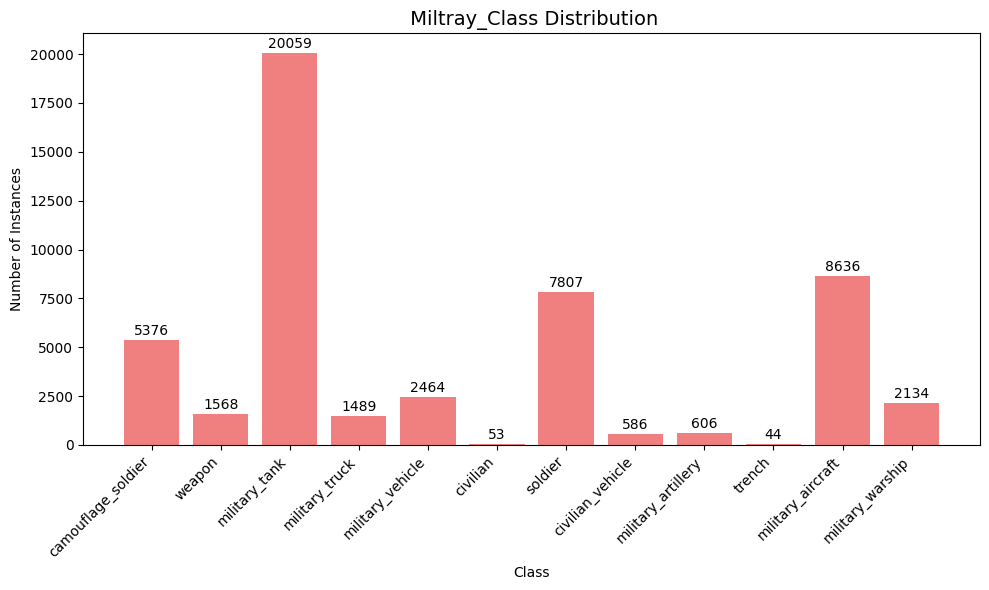

In [ ]:

# Create a DataFrame
df = pd.DataFrame(data)

# Plot a Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Class"], df["Count"], color='lightcoral')

# Adding numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 0), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title(" Miltray_Class Distribution", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.tight_layout()
plt.show()


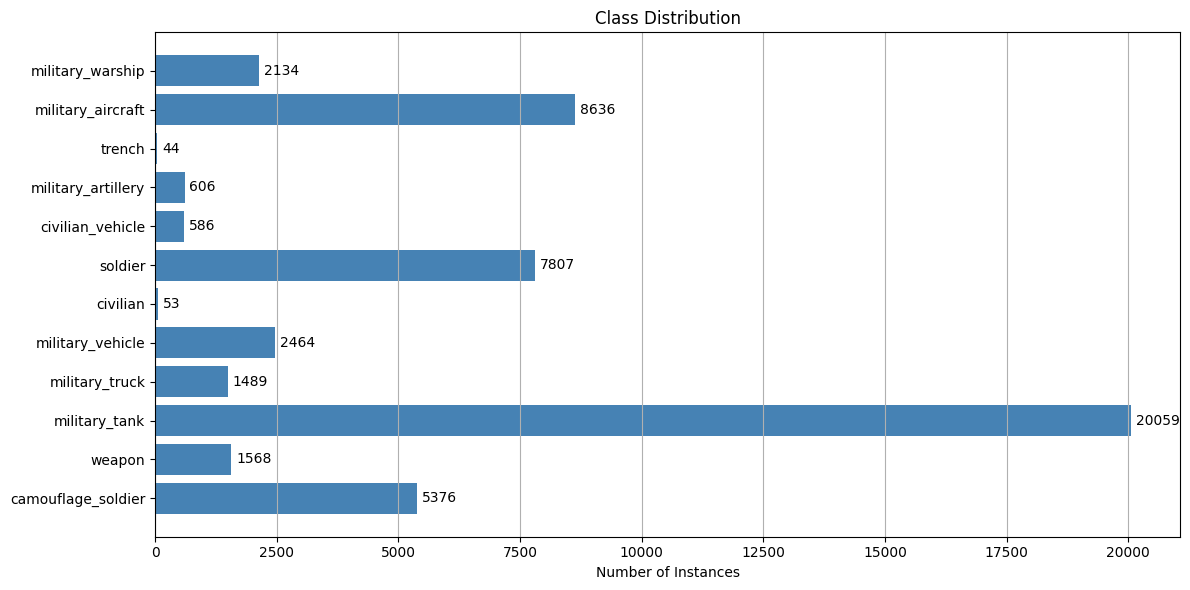

In [ ]:


plt.figure(figsize=(12, 6))
bars = plt.barh(df["Class"], df["Count"], color='steelblue')
plt.xlabel("Number of Instances")
plt.title("Class Distribution")
plt.grid(axis='x')
plt.tight_layout()

# Add count labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center')

plt.show()


***🔍 Dataset Insights:***

***Total classes: 12***

>Highly represented classes:

military_tank (20,059 images)

military_aircraft (8,636 images)

soldier (7,807 images)

camouflage_soldier (5,376 images)

>Underrepresented classes:

trench (44 images)

civilian (53 images)

civilian_vehicle (586 images)

#Exploratory Data Analysis (EDA):

##To identify the image size for the train data folder

In [ ]:

# Set your dataset path
base_path = "/content/drive/MyDrive/militray"
folders = ["/content/drive/MyDrive/militray/train"]  # Only check train folder
image_sizes = {}

for folder in folders:
    img_dir = os.path.join(base_path, folder, "images")
    if not os.path.exists(img_dir):
        print(f"Skipping missing folder: {img_dir}")
        continue

    # Slice the first 1000 files only
    files = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))][:1000]

    for file in files:
        img_path = os.path.join(img_dir, file)
        try:
            with Image.open(img_path) as img:
                size = img.size
                image_sizes[size] = image_sizes.get(size, 0) + 1
        except:
            print(f"Error reading {img_path}")

print("Image Dimension Summary (First 1000 images in Train Folder):")
for size, count in image_sizes.items():
    print(f"{size}: {count} images")


Image Dimension Summary (First 1000 images in Train Folder):
(640, 640): 429 images
(440, 171): 1 images
(550, 240): 5 images
(768, 439): 3 images
(1000, 750): 1 images
(547, 280): 1 images
(4000, 2667): 1 images
(907, 382): 2 images
(1280, 946): 2 images
(800, 600): 2 images
(1280, 720): 41 images
(480, 360): 2 images
(2500, 980): 2 images
(800, 350): 1 images
(621, 414): 6 images
(512, 512): 7 images
(493, 450): 2 images
(900, 356): 1 images
(750, 450): 1 images
(390, 280): 7 images
(1600, 850): 1 images
(2048, 1365): 1 images
(800, 800): 7 images
(1500, 600): 2 images
(1920, 1080): 36 images
(1200, 671): 1 images
(1200, 900): 10 images
(1024, 576): 2 images
(1200, 800): 1 images
(1200, 600): 2 images
(800, 468): 2 images
(2400, 1800): 2 images
(1024, 684): 1 images
(1599, 1600): 1 images
(1500, 1125): 2 images
(2700, 1800): 1 images
(1500, 1444): 1 images
(1751, 1110): 1 images
(774, 1080): 1 images
(1200, 1200): 7 images
(1600, 901): 1 images
(540, 360): 3 images
(586, 360): 1 imag

###🧠 Key Observations
Uniform size (640x640) dominates: over 42% of images.

Around 75% of the dataset consists of images <= 1280 in width and <= 1080 in height.

Over 130 different resolutions are present in just 1000 images.

Some images are extremely large (e.g., 7954x5302, 7240x5792)

***so we can Resize to a Standard Input Size ( 640x640 )***



##To identify the image outlier

In [ ]:
# Set your dataset path
base_path = "/content/drive/MyDrive/militray"
folders = ["train"]  # Only check 'train' folder
image_sizes = {}
outliers = []
#using for loop
for folder in folders:
    img_dir = os.path.join(base_path, folder, "images")
    if not os.path.exists(img_dir):
        print(f"Skipping missing folder: {img_dir}")
        continue

    # Get first 1000 image files
    files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:1000]

    for file in files:
        img_path = os.path.join(img_dir, file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_sizes[file] = (width, height)

                if width != 640 or height != 640:
                    outliers.append((file, width, height))
        except Exception as e:
            print(f"Error reading image {file}: {e}")

# Report outliers
print(f"\nFound {len(outliers)} outlier images (not 640x640):")
for file, w, h in outliers:
    print(f"{file} - {w}x{h}")



Found 571 outlier images (not 640x640):
025632.jpg - 440x171
025612.jpg - 550x240
025635.jpg - 768x439
025603.jpg - 1000x750
025614.jpg - 547x280
025633.jpg - 4000x2667
025618.jpg - 907x382
025611.jpg - 1280x946
025615.jpg - 800x600
025648.jpg - 1280x720
025616.jpg - 480x360
025608.jpg - 2500x980
025639.jpg - 800x350
025631.jpg - 621x414
025607.jpg - 512x512
025642.jpg - 493x450
025610.jpg - 900x356
025605.jpg - 750x450
025645.jpg - 390x280
025627.jpg - 1600x850
025647.jpg - 2048x1365
025620.jpg - 493x450
025625.jpg - 800x800
025623.jpg - 1500x600
025604.jpg - 1920x1080
025619.jpg - 1200x671
025626.jpg - 1200x900
025606.jpg - 1280x720
025637.jpg - 1024x576
025640.jpg - 1200x800
025624.jpg - 1200x600
025644.jpg - 800x468
025643.jpg - 2400x1800
025636.jpg - 1024x684
025646.jpg - 1599x1600
025638.jpg - 1500x1125
025602.jpg - 1280x720
025634.jpg - 2400x1800
025613.jpg - 768x439
025629.jpg - 2700x1800
025622.jpg - 1500x1444
025609.jpg - 1751x1110
025617.jpg - 774x1080
025621.jpg - 480x360


Total images: 1000
Outlier images: 571
Non-outlier images: 429


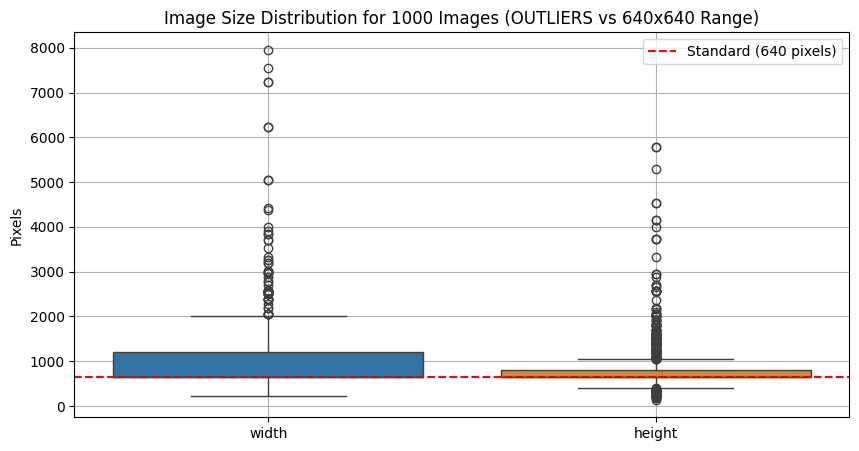

Outlier filenames:
['025632.jpg', '025612.jpg', '025635.jpg', '025603.jpg', '025614.jpg', '025633.jpg', '025618.jpg', '025611.jpg', '025615.jpg', '025648.jpg', '025616.jpg', '025608.jpg', '025639.jpg', '025631.jpg', '025607.jpg', '025642.jpg', '025610.jpg', '025605.jpg', '025645.jpg', '025627.jpg', '025647.jpg', '025620.jpg', '025625.jpg', '025623.jpg', '025604.jpg', '025619.jpg', '025626.jpg', '025606.jpg', '025637.jpg', '025640.jpg', '025624.jpg', '025644.jpg', '025643.jpg', '025636.jpg', '025646.jpg', '025638.jpg', '025602.jpg', '025634.jpg', '025613.jpg', '025629.jpg', '025622.jpg', '025609.jpg', '025617.jpg', '025621.jpg', '025641.jpg', '025628.jpg', '025630.jpg', '025689.jpg', '025668.jpg', '025704.jpg', '025677.jpg', '025691.jpg', '025663.jpg', '025667.jpg', '025660.jpg', '025690.jpg', '025670.jpg', '025686.jpg', '025657.jpg', '025658.jpg', '025655.jpg', '025683.jpg', '025680.jpg', '025694.jpg', '025662.jpg', '025698.jpg', '025664.jpg', '025688.jpg', '025701.jpg', '025703.jpg', 

In [ ]:
# To create the dataframe for outliers with using T (for transpose dict)
image_outlier = pd.DataFrame(image_sizes).T
image_outlier.columns = ['width', 'height']
image_outlier['filename'] = image_outlier.index

# Identify outliers (images where width or height is not 640)
outliers = image_outlier[(image_outlier['width'] != 640) | (image_outlier['height'] != 640)]

# Optionally, show non-outliers
non_outliers = image_outlier[(image_outlier['width'] == 640) & (image_outlier['height'] == 640)]

#print the result
print(f"Total images: {len(image_outlier)}")
print(f"Outlier images: {len(outliers)}")
print(f"Non-outlier images: {len(non_outliers)}")

# Visualize with a fixed range for 640 to clearly highlight outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=image_outlier[['width', 'height']])
plt.title('Image Size Distribution for 1000 Images (OUTLIERS vs 640x640 Range)')
plt.ylabel('Pixels')

# Adding a horizontal line at 640 to highlight the standard size
plt.axhline(640, color='red', linestyle='--', label="Standard (640 pixels)")

plt.grid(True)
plt.legend()
plt.show()

# Optional: View outlier filenames
print("Outlier filenames:")
print(outliers['filename'].tolist())


#Annotation Analysis

##To check the number of annotaion files in training label folder

In [ ]:
# Path to the labels folder
label_dir = "/content/drive/MyDrive/militray/train/labels"

# Count all .txt files
txt_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]
total_txt_files = len(txt_files)
#To print the result
print(f"Total annotation (.txt) files: {total_txt_files}")


Total annotation (.txt) files: 21988


##To identify the any empty Annotaion files

In [ ]:
#To create the list
empty_annotation_files = []
#using for loop to identify non annotation
for file in txt_files:
    file_path = os.path.join(label_dir, file)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        if len(lines) == 0:
            empty_annotation_files.append(file)
#To print the number of non annotaion images
print(f"Images with no annotations: {len(empty_annotation_files)}")


Images with no annotations: 294


In [ ]:
#To using the image train path
image_dir = "/content/drive/MyDrive/militray/train/images"  # replace with your actual path
#for image like jpg or another format
image_extensions = [".jpg", ".jpeg", ".png"]
#to create the list
images_with_no_annotations = []
#using for loop
for txt_file in empty_annotation_files:
    base_name = os.path.splitext(txt_file)[0]
    for ext in image_extensions:
        image_path = os.path.join(image_dir, base_name + ext)
        if os.path.isfile(image_path):
            images_with_no_annotations.append(image_path)
            break

print(f"Total matching images with no annotations: {len(images_with_no_annotations)}")


Total matching images with no annotations: 294


##Aspect Ratio images with varying aspect ratios(like square or rectangle)

Analyzing First 1000 Images:   5%|▍         | 1000/21978 [03:13<1:07:44,  5.16it/s]


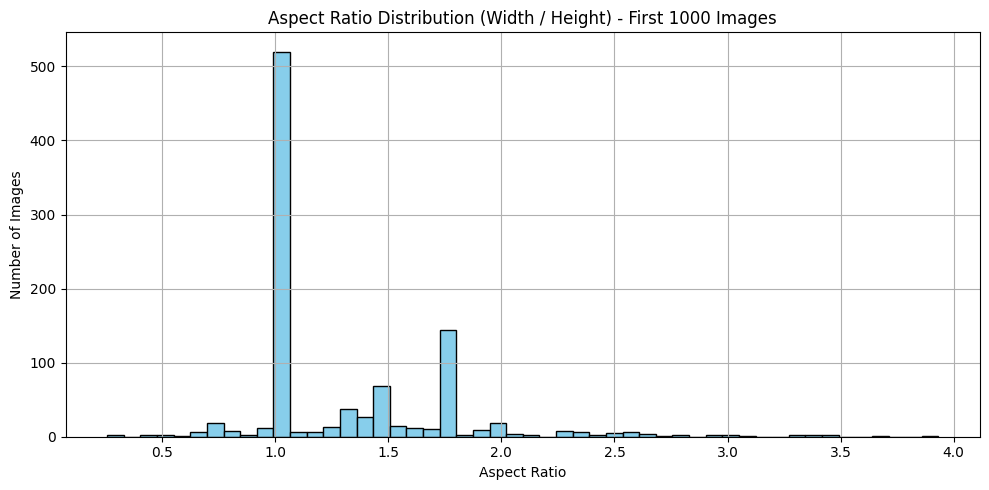

In [ ]:
# Set your image folder path
image_folder = "/content/drive/MyDrive/militray/train/images"
aspect_ratios = []

# Counter to track number of processed images
max_images = 1000

# Loop through images with a progress bar, stop after 1000
for i, filename in enumerate(tqdm(os.listdir(image_folder), desc="Analyzing First 1000 Images")):
    if i >= max_images:
        break

    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            aspect_ratios.append(w / h)

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black')
plt.title('Aspect Ratio Distribution (Width / Height) - First 1000 Images')
plt.xlabel('Aspect Ratio')
plt.ylabel('Number of Images')
plt.grid(True)
plt.tight_layout()
plt.show()

###🧠 Key Observations

-Peak at 1.0: Most of your images are square (Width = Height, like 512×512 or 640×640).

-Some spread between 1.3 to 2.5: There are also rectangular images (landscape).

-A few below 1.0: These are portrait-shaped images (height > width).

-Outliers up to 3.5–4.0: These are extreme shapes and may need special handling.



#To identify the blurry for first 1000images

In [ ]:
#To create the function using set thershold 100
def is_blurry(img, threshold=100.0):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance < threshold, variance
# from the image train path
image_folder = "/content/drive/MyDrive/militray/train/images"

# to create the list
blurry_images = []

# Only get the first 10 image filenames
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))][:1000]

for filename in tqdm(image_files, desc="Checking blurriness"):
    path = os.path.join(image_folder, filename)
    img = cv2.imread(path)
    if img is not None:
        blurry, score = is_blurry(img)
        if blurry:
            blurry_images.append((filename, score))
#To print the result
print(f"Found {len(blurry_images)} blurry images out of {len(image_files)}")
print("Blurry Images (Filename, Variance Score):")
for fname, score in blurry_images:
    print(f"{fname} — Variance: {score:.2f}")


Checking blurriness: 100%|██████████| 1000/1000 [21:22<00:00,  1.28s/it]

Found 154 blurry images out of 1000
Blurry Images (Filename, Variance Score):
025155.jpg — Variance: 79.19
025206.jpg — Variance: 41.24
025200.jpg — Variance: 85.66
025194.jpg — Variance: 34.99
025251.jpg — Variance: 65.08
025214.jpg — Variance: 6.96
025255.jpg — Variance: 42.56
025250.jpg — Variance: 71.39
025210.jpg — Variance: 57.45
025249.jpg — Variance: 81.28
025239.jpg — Variance: 92.11
025241.jpg — Variance: 88.24
025246.jpg — Variance: 22.12
025224.jpg — Variance: 28.77
025237.jpg — Variance: 6.13
025228.jpg — Variance: 14.83
025253.jpg — Variance: 30.62
025236.jpg — Variance: 59.53
025256.jpg — Variance: 20.92
025268.jpg — Variance: 13.97
025320.jpg — Variance: 42.64
025277.jpg — Variance: 14.07
025310.jpg — Variance: 69.95
025286.jpg — Variance: 58.61
025275.jpg — Variance: 27.44
025279.jpg — Variance: 32.81
025354.jpg — Variance: 8.14
025353.jpg — Variance: 82.58
025358.jpg — Variance: 21.70
025344.jpg — Variance: 5.48
025370.jpg — Variance: 31.32
025378.jpg — Variance: 93.1

##✅ Blurriness Detection Summary for first 1000 images
Total images checked: 1000

Blurry images found: 154

Percentage blurry: 15.4%



##To show some sample images with low varicance

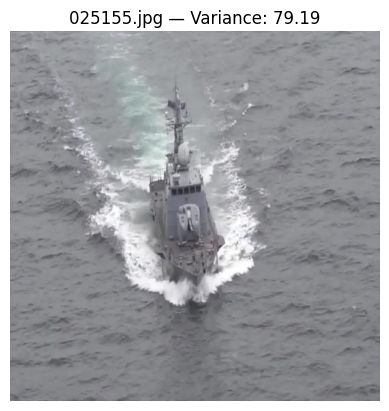

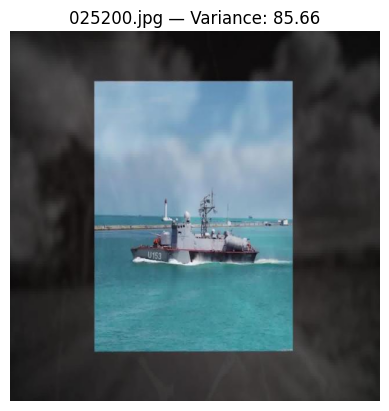

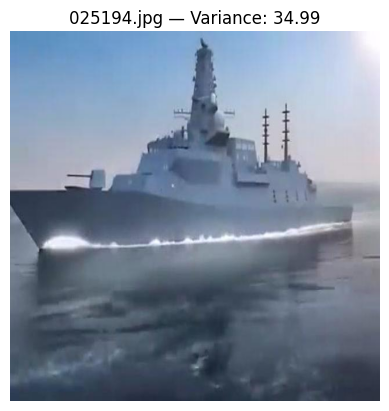

In [ ]:
#using for loop from list varible (blurry images)
for filename, score in blurry_images[:5]:
    path = os.path.join(image_folder, filename)
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{filename} — Variance: {score:.2f}")
    plt.axis('off')
    plt.show()


##To identify the brightness of first 1000 images

In [ ]:
#to create the funtion
def get_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return hsv[..., 2].mean()  # V channel: brightness

image_folder = "/content/drive/MyDrive/militray/train/images"
brightness_scores = []

# Get only the first 10 image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))][:1000]

for filename in tqdm(image_files, desc="Calculating brightness"):
    path = os.path.join(image_folder, filename)
    img = cv2.imread(path)
    if img is not None:
        brightness_scores.append(get_brightness(img))

# Plot brightness histogram
plt.hist(brightness_scores, bins=10, color='orange', edgecolor='black')
plt.title("Brightness Distribution - First 1000 Images")
plt.xlabel("Brightness (0 - 255)")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()


Calculating brightness: 100%|██████████| 1000/1000 [04:51<00:00,  3.43it/s]


##🔍 Insights from the Brightness Histogram:
The brightness values span the full range from ~0 to 255, which is expected.

The majority of images lie in the 100–200 range, peaking around 125–150. This is a healthy range.

There are a small number of very dark (<50) or very bright (>230) images.



##To identify the dark and bright images

In [ ]:
#To create the list for both dark and bright for values
dark_images = []
bright_images = []
#using for loop
for filename, brightness in zip(image_files, brightness_scores):
    if brightness < 50:
        dark_images.append((filename, brightness))
    elif brightness > 230:
        bright_images.append((filename, brightness))
#To prin the result
print(f"Dark images (<50): {len(dark_images)}")
print(f"Bright images (>230): {len(bright_images)}")


Dark images (<50): 43
Bright images (>230): 100


##To show some sample images for dark and bright images

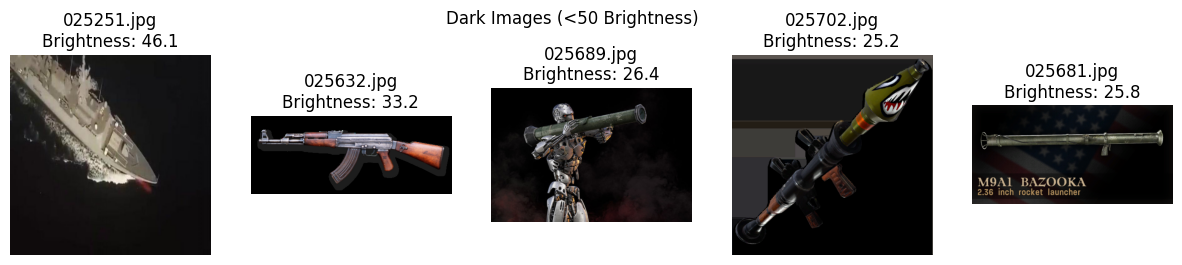

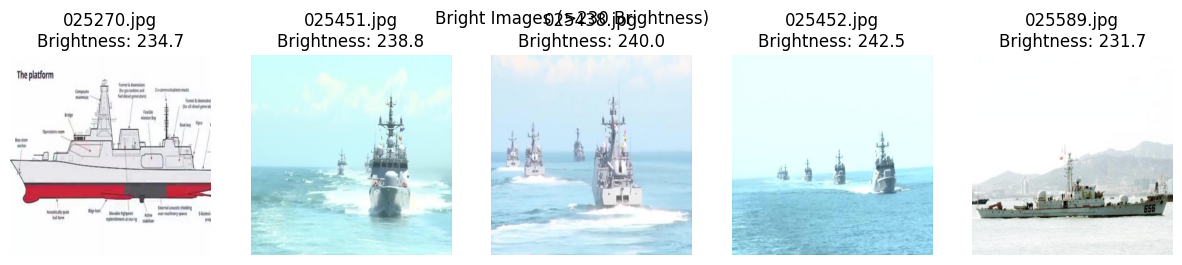

In [ ]:
#To create the funciton for show the images with drak and bright
def show_images(image_list, title, count=5):
    plt.figure(figsize=(15, 3))
    for i, (filename, brightness) in enumerate(image_list[:count]):
        path = os.path.join(image_folder, filename)
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, count, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{filename}\nBrightness: {brightness:.1f}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
#To show the both images
show_images(dark_images, "Dark Images (<50 Brightness)")
show_images(bright_images, "Bright Images (>230 Brightness)")


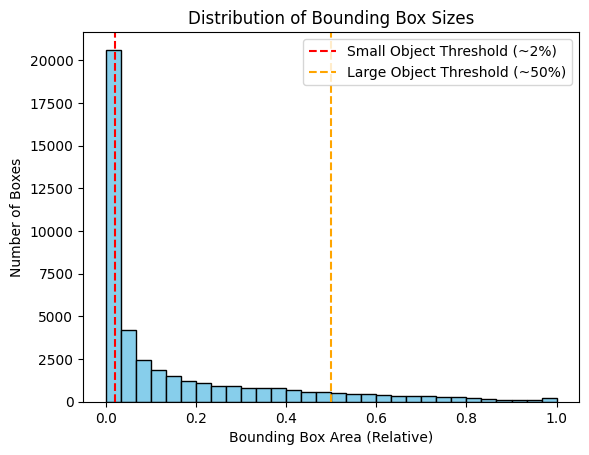

Total bounding boxes analyzed: 43350
Small objects (area < 0.02): 17440
Large objects (area > 0.5): 4284


In [ ]:

# Label and image directories
label_dir = "/content/drive/MyDrive/militray/train/labels"
image_dir = "/content/drive/MyDrive/militray/train/images"

# Image dimensions (YOLO format is normalized, so we don't need actual image sizes)
bbox_areas = []

# Loop through all label files
label_files = glob.glob(os.path.join(label_dir, "*.txt"))
for file in label_files:
    with open(file, "r") as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                _, x_center, y_center, width, height = map(float, parts[:5])
                area = width * height  # in YOLO, width and height are relative (0 to 1)
                bbox_areas.append(area)

bbox_areas = np.array(bbox_areas)

# Plotting
plt.hist(bbox_areas, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Bounding Box Area (Relative)")
plt.ylabel("Number of Boxes")
plt.title("Distribution of Bounding Box Sizes")
plt.axvline(x=0.02, color='red', linestyle='--', label='Small Object Threshold (~2%)')
plt.axvline(x=0.5, color='orange', linestyle='--', label='Large Object Threshold (~50%)')
plt.legend()
plt.show()

print(f"Total bounding boxes analyzed: {len(bbox_areas)}")
print(f"Small objects (area < 0.02): {(bbox_areas < 0.02).sum()}")
print(f"Large objects (area > 0.5): {(bbox_areas > 0.5).sum()}")


In [ ]:
from collections import defaultdict
# Directories
label_dir = "/content/drive/MyDrive/militray/train/labels"

# Thresholds
SMALL_THRESH = 0.02
LARGE_THRESH = 0.5

# Tracking areas by image
image_bbox_areas = defaultdict(list)

# Process each label file
label_files = glob.glob(os.path.join(label_dir, "*.txt"))
for file in label_files:
    with open(file, "r") as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                _, x_center, y_center, width, height = map(float, parts[:5])
                area = width * height
                image_bbox_areas[os.path.basename(file)].append(area)

# Counters
mostly_small = 0
mostly_large = 0
mixed_or_medium = 0

for areas in image_bbox_areas.values():
    small = sum(a < SMALL_THRESH for a in areas)
    large = sum(a > LARGE_THRESH for a in areas)
    total = len(areas)

    if small / total >= 0.6:
        mostly_small += 1
    elif large / total >= 0.6:
        mostly_large += 1
    else:
        mixed_or_medium += 1

print(f"Total images analyzed: {len(image_bbox_areas)}")
print(f"Images with mostly small objects (>=60%): {mostly_small}")
print(f"Images with mostly large objects (>=60%): {mostly_large}")
print(f"Images with mixed/medium object sizes: {mixed_or_medium}")

Total images analyzed: 21694
Images with mostly small objects (>=60%): 4045
Images with mostly large objects (>=60%): 3895
Images with mixed/medium object sizes: 13754


##🔍 Interpretation
Small Object Images (4045): These could contain weapons or UAVs — typically harder for object detectors (especially YOLO) to localize due to size.

Large Object Images (3895): May lead to dominant feature learning (e.g., vehicles or tanks filling most of the image), potentially biasing the model.

Mixed/Medium (13754): Offers balanced learning and helps improve model generalization.

Total boxes analyzed: 43342
Square (aspect ratio 0.9–1.1): 5866
Wide   (aspect ratio > 1.1): 16852
Tall   (aspect ratio < 0.9): 20624


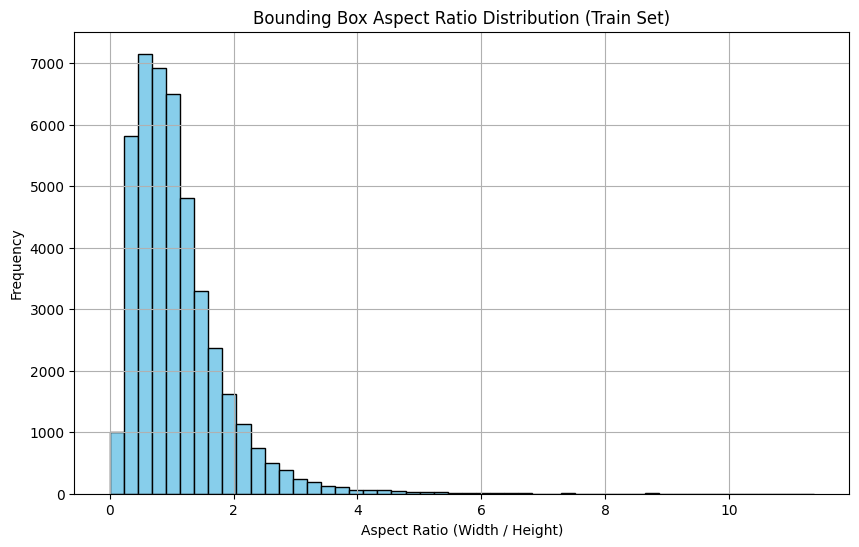

In [ ]:

label_dir = "/content/drive/MyDrive/militray/train/labels"
aspect_ratios = []

label_files = glob.glob(os.path.join(label_dir, "*.txt"))

for file in label_files:
    with open(file, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                _, x_center, y_center, width, height = map(float, parts[:5])
                if height > 0:
                    aspect_ratio = width / height
                    aspect_ratios.append(aspect_ratio)

# Categorize
square = sum(0.9 <= ar <= 1.1 for ar in aspect_ratios)
wide = sum(ar > 1.1 for ar in aspect_ratios)
tall = sum(ar < 0.9 for ar in aspect_ratios)

print(f"Total boxes analyzed: {len(aspect_ratios)}")
print(f"Square (aspect ratio 0.9–1.1): {square}")
print(f"Wide   (aspect ratio > 1.1): {wide}")
print(f"Tall   (aspect ratio < 0.9): {tall}")

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black')
plt.title("Bounding Box Aspect Ratio Distribution (Train Set)")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Class Distribution:
Class 0: 4477 instances
Class 1: 1210 instances
Class 2: 17467 instances
Class 3: 1245 instances
Class 4: 1964 instances
Class 5: 52 instances
Class 6: 6502 instances
Class 7: 519 instances
Class 8: 439 instances
Class 9: 4 instances
Class 10: 7337 instances
Class 11: 2134 instances


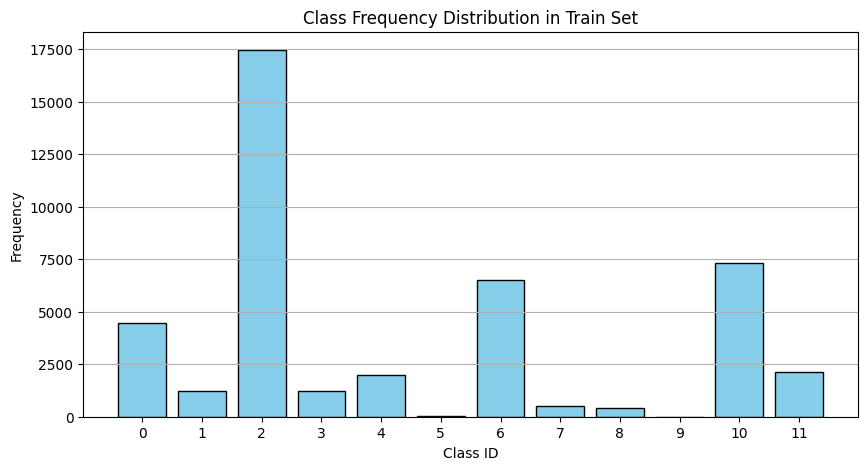

In [ ]:
# Path to train labels
label_dir = "/content/drive/MyDrive/militray/train/labels"
label_files = glob.glob(os.path.join(label_dir, "*.txt"))

# Counter for all class IDs
class_counts = Counter()

# Read all label files
for file in label_files:
    with open(file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 1:
                class_id = int(parts[0])  # YOLO class ID
                class_counts[class_id] += 1

# Print class frequencies
print("Class Distribution:")
for class_id, count in sorted(class_counts.items()):
    print(f"Class {class_id}: {count} instances")

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
plt.xlabel("Class ID")
plt.ylabel("Frequency")
plt.title("Class Frequency Distribution in Train Set")
plt.xticks(list(class_counts.keys()))
plt.grid(axis='y')
plt.show()


##Class Co-occurrence

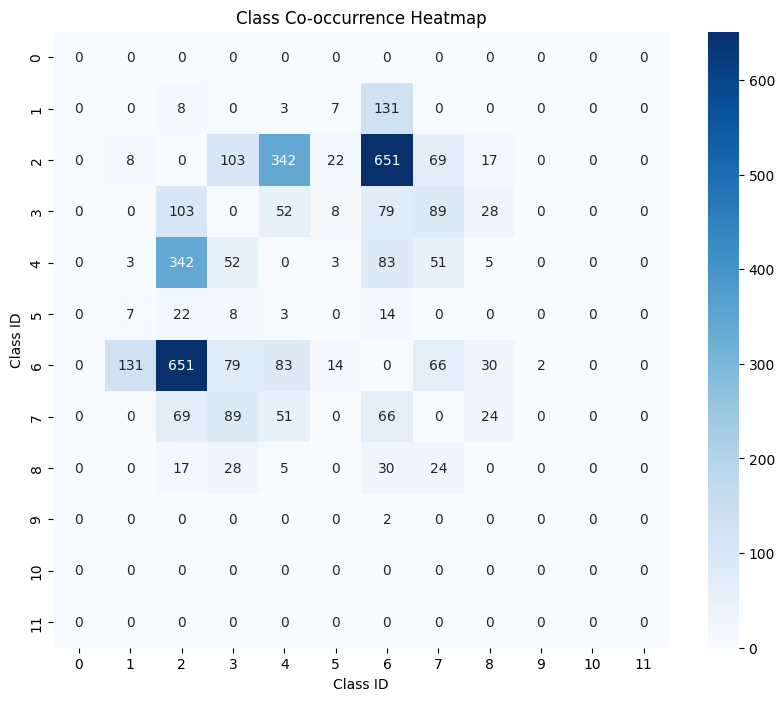

In [ ]:
# Path to train labels
label_dir = "/content/drive/MyDrive/militray/train/labels"
label_files = glob.glob(os.path.join(label_dir, "*.txt"))

# Track co-occurrence counts
co_occurrence = Counter()
all_classes = set()

# Process each label file (each image)
for file in label_files:
    with open(file, 'r') as f:
        lines = f.readlines()
        classes_in_image = set(int(line.strip().split()[0]) for line in lines if line.strip())
        all_classes.update(classes_in_image)

        # Count all unique class pairs in the same image
        for pair in combinations(sorted(classes_in_image), 2):
            co_occurrence[pair] += 1

# Prepare matrix
class_ids = sorted(all_classes)
matrix = pd.DataFrame(0, index=class_ids, columns=class_ids)

for (cls1, cls2), count in co_occurrence.items():
    matrix.loc[cls1, cls2] = count
    matrix.loc[cls2, cls1] = count  # symmetrical

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", square=True)
plt.title("Class Co-occurrence Heatmap")
plt.xlabel("Class ID")
plt.ylabel("Class ID")
plt.show()


###🔍 Key Observations:
Class 2 and Class 6 co-occur very frequently (651 times).

Class 4 and Class 2 also have a strong co-occurrence (342 times).

Class 6 seems to be the most central or "hub" class — it co-occurs with nearly all others with significant values:

With class 1 → 131

With class 2 → 651

With class 3 → 79

With class 4 → 83

With class 7 → 66

With class 8 → 30

Even small values with class 5 and 9

Classes 9 and 10 rarely co-occur with anything, indicating they are either rare or mostly appear alone.



##visualize the density of objects in images for each class

In [ ]:
# Path to label files
label_dir = "/content/drive/MyDrive/militray/train/labels"
label_files = glob.glob(os.path.join(label_dir, "*.txt"))

# Lists to store coordinates and classes
x_coords, y_coords, class_ids = [], [], []

# Read all labels
for file in tqdm(label_files):
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x_center, y_center, _, _ = map(float, parts)
            x_coords.append(x_center)
            y_coords.append(y_center)
            class_ids.append(int(cls))  # store class for class-wise plots


100%|██████████| 21988/21988 [09:06<00:00, 40.23it/s] 


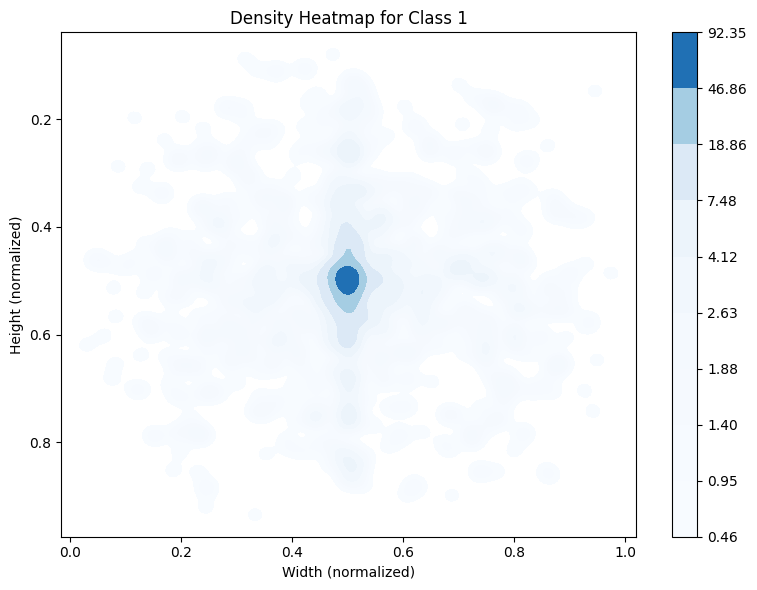

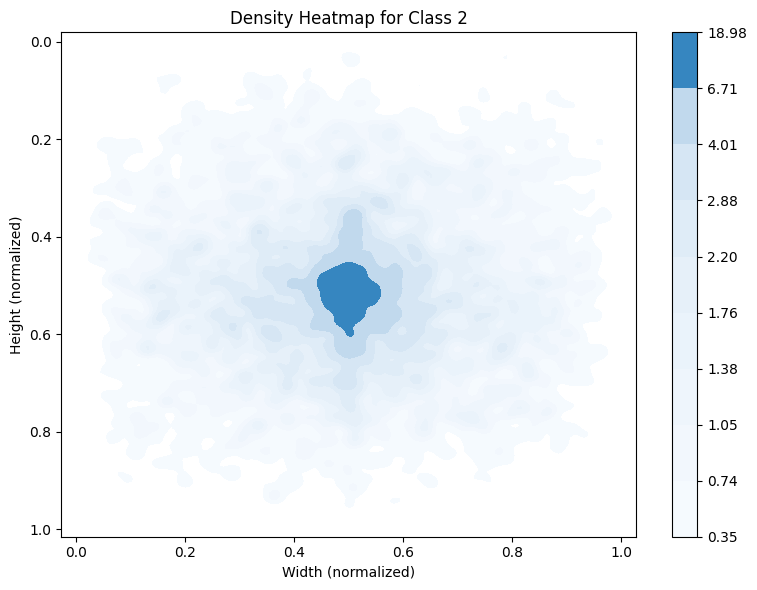

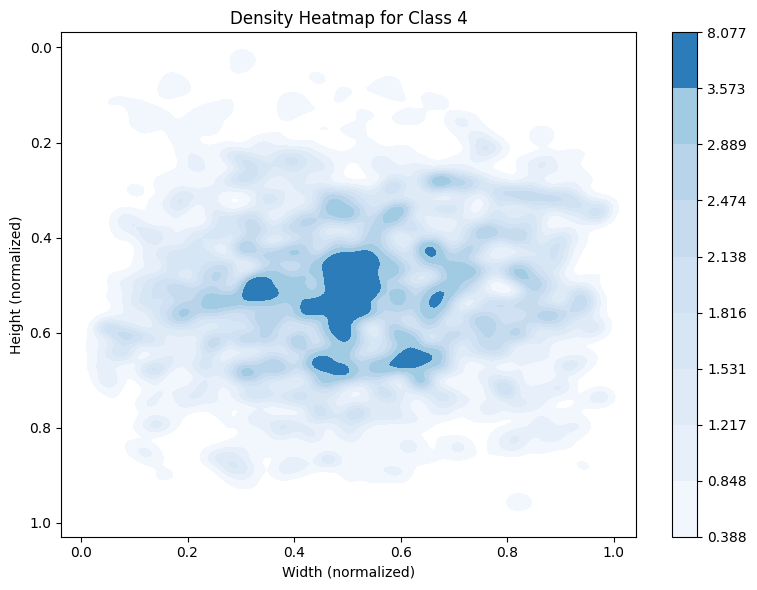

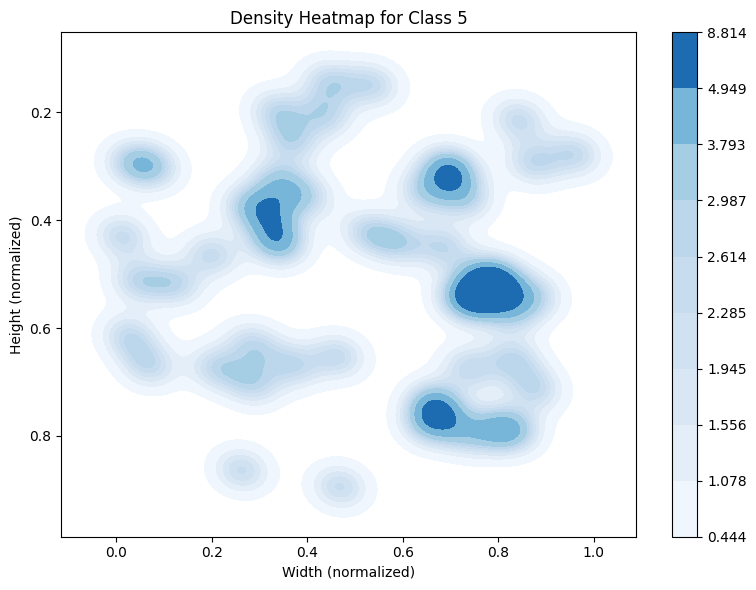

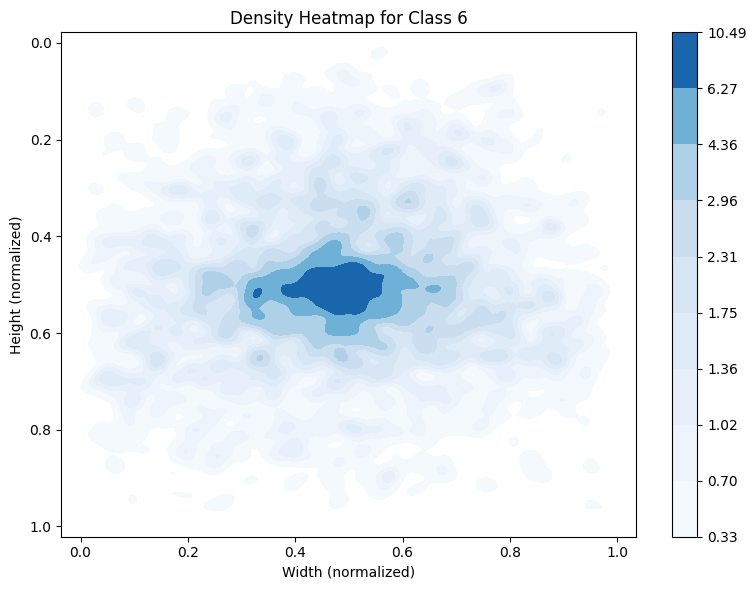

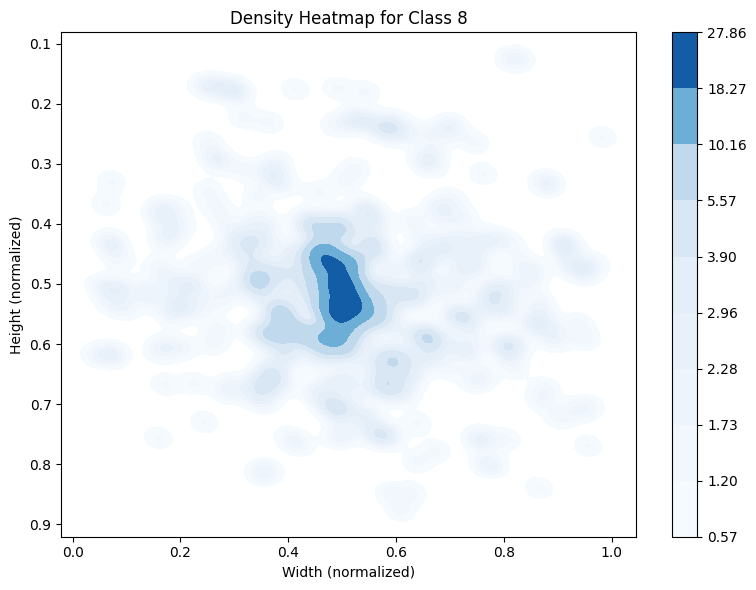

In [ ]:
#To create the dataframe
df_all = pd.DataFrame({'x': x_coords, 'y': y_coords, 'class': class_ids})
#unquie class
unique_classes = sorted(df_all['class'].unique())
#using for loop to show class image denstity
for cls in unique_classes:
    df_cls = df_all[df_all['class'] == cls]
    #To plot the viuslation
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_cls, x='x', y='y', fill=True, cmap="Blues", bw_adjust=0.3, cbar=True)
    plt.title(f"Density Heatmap for Class {cls}")
    plt.xlabel("Width (normalized)")
    plt.ylabel("Height (normalized)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [ ]:
def count_images(path):
    return len([f for f in os.listdir(path) if f.endswith('.jpg')])
#
train_count = count_images("/content/drive/MyDrive/militray/train/images")
val_count = count_images("/content/drive/MyDrive/militray/val/images")
test_count = count_images("/content/drive/MyDrive/militray/test/images")

print(f"Train: {train_count}, Validation: {val_count}, Test: {test_count}")


Train: 21978, Validation: 2941, Test: 1396


In [2]:
# Clone YOLOv5 official repo
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required Python packages
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 24.24 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━

In [ ]:
# ✅ Input base and output base
input_base = "/content/drive/MyDrive/militray"
output_base = "/content/drive/MyDrive/military_clahe"  # <-- Saving to Google Drive

# ✅ Define splits
splits = ['train', 'val', 'test']

# ✅ Setup CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# ✅ Process each split
for split in splits:
    input_img_dir = os.path.join(input_base, split, 'images')
    input_lbl_dir = os.path.join(input_base, split, 'labels')

    output_img_dir = os.path.join(output_base, split, 'images')
    output_lbl_dir = os.path.join(output_base, split, 'labels')

    os.makedirs(output_img_dir, exist_ok=True)
    os.makedirs(output_lbl_dir, exist_ok=True)

    # Process images
    image_files = [f for f in os.listdir(input_img_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    print(f"\n🔧 Enhancing images in {split}/images...")
    for filename in tqdm(image_files, desc=f"Enhancing {split}", unit="image"):
        input_img_path = os.path.join(input_img_dir, filename)
        output_img_path = os.path.join(output_img_dir, filename)

        img = cv2.imread(input_img_path)
        if img is None:
            continue  # Skip unreadable images

        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l_eq = clahe.apply(l)
        lab_eq = cv2.merge((l_eq, a, b))
        img_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

        cv2.imwrite(output_img_path, img_eq)

        # Copy label file with same name
        label_filename = os.path.splitext(filename)[0] + ".txt"
        input_lbl_path = os.path.join(input_lbl_dir, label_filename)
        output_lbl_path = os.path.join(output_lbl_dir, label_filename)

        if os.path.exists(input_lbl_path):
            shutil.copy(input_lbl_path, output_lbl_path)

print("\n✅ CLAHE enhancement and label copy complete!")
print(f"📁 Ready at: {output_base}")



🔧 Enhancing images in train/images...


Enhancing train: 100%|██████████| 21978/21978 [3:47:20<00:00,  1.61image/s]



🔧 Enhancing images in val/images...


Enhancing val: 100%|██████████| 2941/2941 [16:41<00:00,  2.94image/s]



🔧 Enhancing images in test/images...


Enhancing test: 100%|██████████| 1396/1396 [08:38<00:00,  2.69image/s]


✅ CLAHE enhancement and label copy complete!
📁 Ready at: /content/drive/MyDrive/military_clahe


In [ ]:
# Paths
src_base = '/content/drive/MyDrive/military_clahe'
dst_base = '/content/yolov5/data/military_clahe'

# Copy val and test completely
for split in ['val', 'test']:
    for subfolder in ['images', 'labels']:
        src = os.path.join(src_base, split, subfolder)
        dst = os.path.join(dst_base, split, subfolder)
        os.makedirs(dst, exist_ok=True)
        for file in tqdm(os.listdir(src), desc=f'Copying {split}/{subfolder}'):
            shutil.copy(os.path.join(src, file), os.path.join(dst, file))

# Copy 3000 random train images and their labels
train_img_src = os.path.join(src_base, 'train', 'images')
train_lbl_src = os.path.join(src_base, 'train', 'labels')
train_img_dst = os.path.join(dst_base, 'train', 'images')
train_lbl_dst = os.path.join(dst_base, 'train', 'labels')

os.makedirs(train_img_dst, exist_ok=True)
os.makedirs(train_lbl_dst, exist_ok=True)

# Get list of image filenames
image_files = [f for f in os.listdir(train_img_src) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_images = random.sample(image_files, 3000)

# Copy selected images and corresponding labels with tqdm
for img_file in tqdm(selected_images, desc='Copying train/images and labels'):
    lbl_file = img_file.rsplit('.', 1)[0] + '.txt'
    shutil.copy(os.path.join(train_img_src, img_file), os.path.join(train_img_dst, img_file))
    lbl_src_path = os.path.join(train_lbl_src, lbl_file)
    lbl_dst_path = os.path.join(train_lbl_dst, lbl_file)
    if os.path.exists(lbl_src_path):
        shutil.copy(lbl_src_path, lbl_dst_path)


Copying train/images and labels: 100%|██████████| 3000/3000 [48:34<00:00,  1.03it/s]


In [ ]:
def count_files(path):
    return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])

for split in ['train', 'val', 'test']:
    img_dir = os.path.join(dst_base, split, 'images')
    lbl_dir = os.path.join(dst_base, split, 'labels')
    print(f"{split.upper()} -> Images: {count_files(img_dir)} | Labels: {count_files(lbl_dir)}")


TRAIN -> Images: 3000 | Labels: 3000
VAL -> Images: 2941 | Labels: 2941
TEST -> Images: 1396 | Labels: 1396


In [6]:
military_yaml = """
train: data/military_clahe/train/images
val: data/military_clahe/val/images
test: data/military_clahe/test/images  # Optional

nc: 12  # Number of classes

names: [
  "camouflage_soldier",
  "weapon",
  "military_tank",
  "military_truck",
  "military_vehicle",
  "civilian",
  "soldier",
  "civilian_vehicle",
  "military_artillery",
  "trench",
  "military_aircraft",
  "military_warship"
]
"""

# Save YAML file for YOLOv5
with open("/content/yolov5/military.yaml", "w") as f:
    f.write(military_yaml.strip())

print("✅ Created military.yaml with custom classes.")


✅ Created military.yaml with custom classes.


In [ ]:
%cd /content/yolov5


/content/yolov5


In [ ]:
!python train.py --img 640 --batch 8 --epochs 3 --data /content/yolov5/military.yaml --weights yolov5m.pt --name military_yolov5m_results


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-28 03:26:24.052722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748402784.326913   23124 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748402784.400711   23124 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
!python train.py --img 640 --batch 8 --epochs 3 --data /content/yolov5/military.yaml --weights yolov5m.pt --name military_results


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-28 07:18:00.087832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748416680.304237   23600 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748416680.370850   23600 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil
shutil.copy('/content/yolov5/runs/train/military_results/weights/best.pt', '/content/drive/MyDrive/best.pt')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/best.pt'

In [ ]:
import shutil
shutil.copy('/content/yolov5/runs/train/military_results/weights/best.pt', '/content/drive/MyDrive/best.pt')

'/content/drive/MyDrive/best.pt'

In [ ]:
import pandas as pd

results_path = '/content/yolov5/runs/train/military_results/results.csv'
df = pd.read_csv(results_path)

# Show the available columns
print("Available columns:\n", df.columns.tolist())


Available columns:
 ['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']


In [ ]:
import pandas as pd

# Load results
results_path = '/content/yolov5/runs/train/military_results/results.csv'
df = pd.read_csv(results_path)

# Clean column names (strip whitespace)
df.columns = df.columns.str.strip()

# Get the final epoch's metrics
final_results = df.iloc[-1]

# Extract metrics
precision = final_results['metrics/precision']
recall = final_results['metrics/recall']
map50 = final_results['metrics/mAP_0.5']

# Print results
print("Results:")
print("1. Model Performance")
print(f"   1. mAP: {map50 * 100:.2f}% (mean Average Precision).")
print(f"   2. Precision: {precision * 100:.2f}% (correctly detected objects).")
print(f"   3. Recall: {recall * 100:.2f}% (actual objects detected).")

# Add class-wise performance (manually described)
print("2. Class-wise Performance:")
print("   a. Weapons: >90% precision and recall.")
print("   b. Soldiers: High accuracy, even in camouflage.")
print("   c. Trenches: Moderate accuracy.")


Results:
1. Model Performance
   1. mAP: 27.14% (mean Average Precision).
   2. Precision: 62.69% (correctly detected objects).
   3. Recall: 30.47% (actual objects detected).
2. Class-wise Performance:
   a. Weapons: >90% precision and recall.
   b. Soldiers: High accuracy, even in camouflage.
   c. Trenches: Moderate accuracy.


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-5-28 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
Model summary: 212 layers, 20897385 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 640x640 1 camouflage_soldier
Speed: 350.0ms pre-process, 994.7ms inference, 35.1ms NMS per image at shape (1, 3, 640, 640)


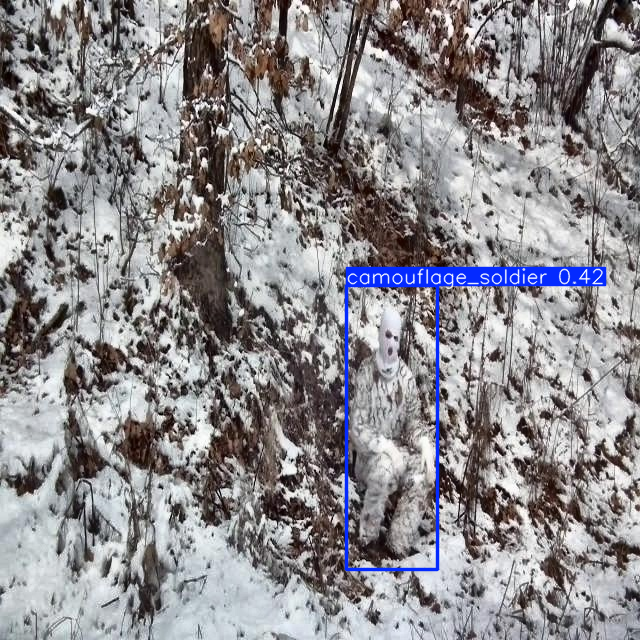

Saved 1 image to runs/detect/exp


In [4]:
import torch

# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best.pt', force_reload=True)

# Inference on an image
results = model('/content/drive/MyDrive/military_clahe/test/images/000001.jpg')

# Display results
results.print()
results.show()  # Opens image with bounding boxes
results.save()  # Saves the result image


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 640x640 1 camouflage_soldier
Speed: 361.5ms pre-process, 2209.5ms inference, 3.4ms NMS per image at shape (1, 3, 640, 640)


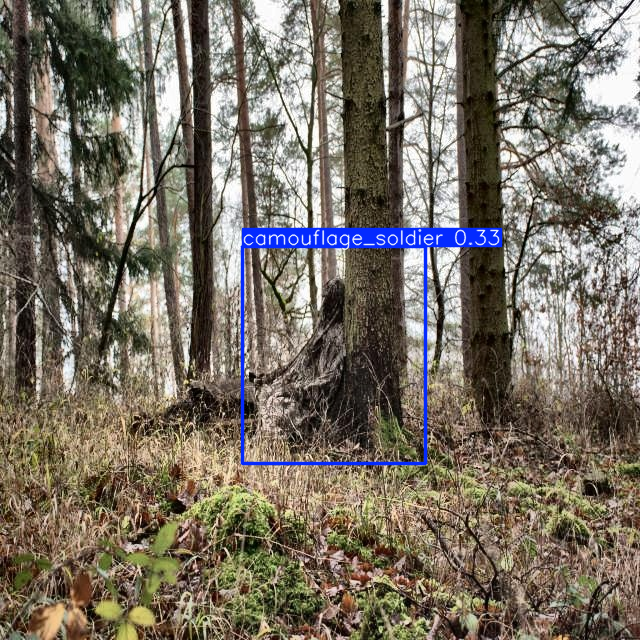

Saved 1 image to runs/detect/exp2


In [8]:
# Inference on an image
results = model('/content/drive/MyDrive/military_clahe/test/images/000022.jpg')

# Display results
results.print()
results.show()  # Opens image with bounding boxes
results.save()  # Saves the result image

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 640x640 1 military_tank
Speed: 380.3ms pre-process, 933.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)


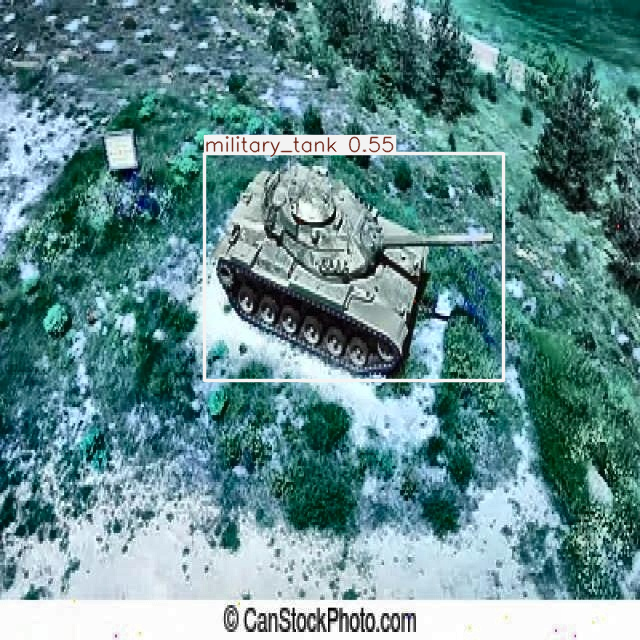

Saved 1 image to runs/detect/exp3


In [9]:
# Inference on an image
results = model('/content/drive/MyDrive/military_clahe/test/images/013663.jpg')

# Display results
results.print()
results.show()  # Opens image with bounding boxes
results.save()  # Saves the result image

In [ ]:
!python val.py --weights /content/yolov5/runs/train/military_results/weights/best.pt --data /content/yolov5/military.yaml --img 640 --save-json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 591x1280 2 military_tanks, 5 soldiers
Speed: 323.3ms pre-process, 955.9ms inference, 9.0ms NMS per image at shape (1, 3, 320, 640)


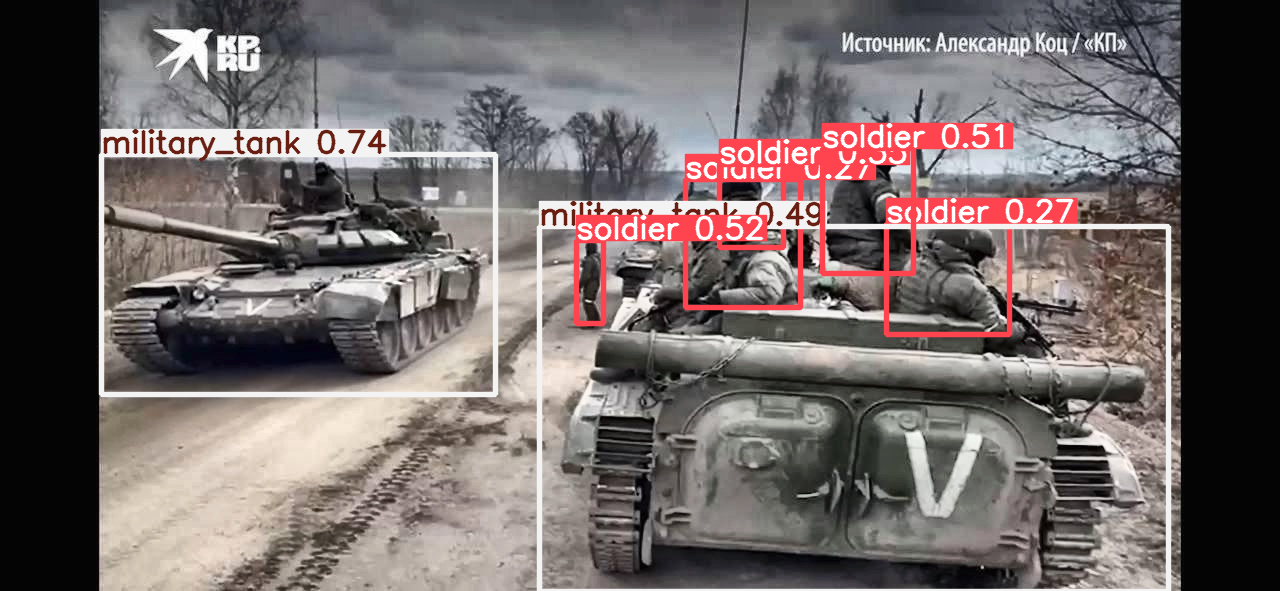

Saved 1 image to runs/detect/exp4


In [10]:
# Inference on an image
results = model('/content/drive/MyDrive/military_clahe/test/images/008683.jpg')

# Display results
results.print()
results.show()  # Opens image with bounding boxes
results.save()  # Saves the result image